# Modifying Visualizations
Once you've created an visualization, it likely needs to be modified to be publication ready. This usually entails creating a title, labelling axis, and resizing the image. This documentation is synthesized from the [plotly update_layout documentation](https://plotly.com/python/reference/layout/). 

While somewhat complicated, [full documentation for updating figures](https://plotly.com/python/creating-and-updating-figures) is available on the plotly website, and should be used as a supplement to this documentation for doing more complex modifications to the figures produced by `epidemic-intelligence`. Plotly as a whole has excellent documentation and clear examples, and it is highly recommended that you use it if you ever get stuck. 

In [25]:
# creating an example plot
import epidemic_intelligence as ei
from google.oauth2 import service_account
from google.cloud import bigquery

credentials = service_account.Credentials.from_service_account_file('../../../credentials.json') # use the path to your credentials
project = 'net-data-viz-handbook' # use your project name
# Initialize a GC client
client = bigquery.Client(credentials=credentials, project=project)

table_name = 'h1n1_R2.basins_prevalence_agg'
reference_table = 'reference.gleam-geo-map'
reference_column = 'basin_id' # name of a column in reference table
geo_column = 'basin_id' # name of a column in table corresponding to column in reference table
geo_level = 'basin_label' 
geo_values = 'Portland(US-ME)' 
value = 'Infectious_18_23'

fig = ei.spaghetti_plot(
    client=client,
    table_name=table_name,
    reference_table=reference_table,
    geo_level=geo_level,
    geo_values=geo_values,
    geo_column=geo_column,
    reference_column=reference_column,
    value=value,
    n=100)

fig

## Updating the title, axes, and legend
Full documentation for mofidying the axes can be found [here](https://plotly.com/python/axes/#2d-cartesian-axis-types-and-autodetection).

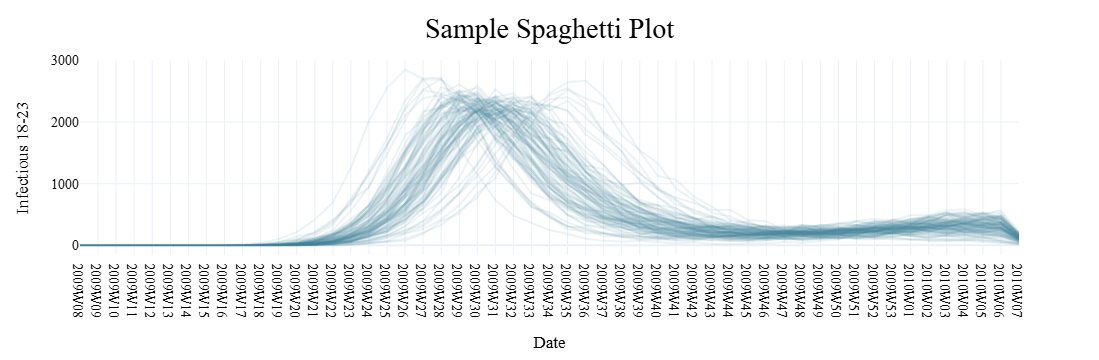

In [26]:
# the axis titles can be changed with the xaxis_title and yaxis_title parameters of update_layout. 
fig.update_layout(xaxis_title='Date',
                  yaxis_title='Infectious 18-23')

# the plot title can be set with the title_text keyword.
fig.update_layout(title_text='Sample Spaghetti Plot')

# the legend can be toggled on or off by setting the showlegend keyword to True or False.
fig.update_layout(showlegend=False)
fig

In [27]:
# add ticks 
fig.update_yaxes(ticks="outside")

# add ticks, set the range, and rotate the labels degrees
fig.update_xaxes(ticks="outside", tickangle=60,
                range=[10, 40])
fig

## Setting image dimensions

In [28]:
# the plot dimensions, in pixels, can be set using the width and height keywords. 
fig.update_layout(width=800, height=600)

## Setting a custom font
Fonts in plotly are tricky, and unfortunately `epidemic-intelligence` is limited by their limitations. The easiest way to set a custom font is to have it installed on your local system. For example, if you would like to use Barlow Semi Condensed, the simplest path would be to [install it through a site like Google Fonts](https://fonts.google.com/specimen/Barlow+Semi+Condensed). *Note: if a specified font cannot be found, plotly will use Times New Roman.*

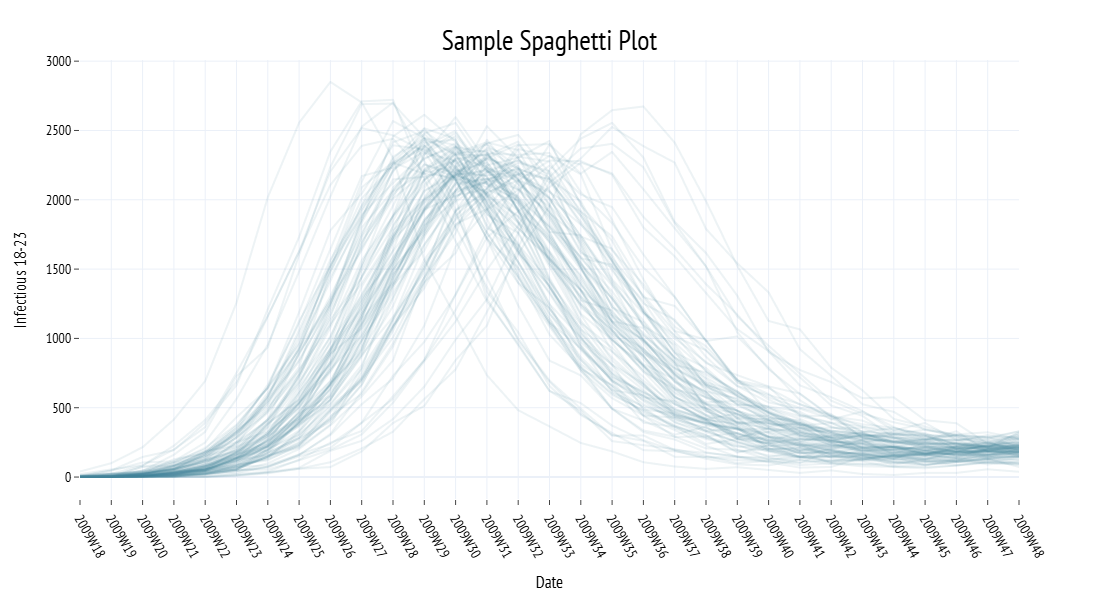

In [29]:
fig.update_layout(font_family='PT Sans Narrow')

# Exporting Visualizations
Full documentation for static image export can be found [here](https://plotly.com/python/static-image-export/).

In [30]:
# also supports pdf, jpg, webp, and svg extensions. 
# the 'scale' parameter multiplies the number of pixels in the image, so scale>1 means higher resolution. 
fig.write_image("fig.png", scale=3)

<img src="fig.png" alt="Exported Figure" width="600" style="margin:auto;"/>